In [1]:
from pathlib import Path
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mne

DATA = Path("../data/ds005420")

In [2]:
subject_id = "sub-1"
eeg_path = DATA/f"{subject_id}/eeg/{subject_id}_task-oa_eeg.edf"
raw = mne.io.read_raw_edf(eeg_path)
eeg = raw.to_data_frame()
eeg.head()

Extracting EDF parameters from /home/fdamicel/projects/pycourse-2025/data/ds005420/sub-1/eeg/sub-1_task-oa_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


,time,EEG Fp1-A1A2,EEG Fp2-A1A2,EEG Fz-A1A2,EEG F3-A1A2,EEG F4-A1A2,EEG F7-A1A2,EEG F8-A1A2,EEG Cz-A1A2,EEG C3-A1A2,...,EEG T3-A1A2,EEG T4-A1A2,EEG Pz-A1A2,EEG P3-A1A2,EEG P4-A1A2,EEG T5-A1A2,EEG T6-A1A2,EEG O1-A1A2,EEG O2-A1A2,EEG LOC-ROC
0,0.000,10.532056,1.834553,1.987141,6.717362,2.750080,6.412186,-27.157123,8.243240,-5.642248,...,5.344072,5.649248,2.292317,7.480301,9.311354,4.886309,4.733721,8.701003,5.191484,3.055255
1,0.002,10.989820,2.292317,2.444904,7.785476,3.665607,6.869950,-33.260634,10.837232,-6.862950,...,6.564774,8.701003,3.207843,9.769117,11.905346,6.412186,7.175125,11.294995,6.564774,4.428545
2,0.004,9.769117,3.055255,2.750080,8.853591,3.818194,6.412186,-36.159802,12.973461,-7.320713,...,6.717362,11.294995,3.970782,11.600171,13.888987,7.022537,9.006179,12.820873,6.717362,4.886309
3,0.006,7.175125,3.970782,3.207843,10.074293,3.360431,5.038896,-36.159802,14.041575,-7.320713,...,6.412186,12.820873,4.581133,12.668285,14.804514,7.022537,10.074293,12.973461,6.259599,4.123370
4,0.008,4.123370,5.038896,3.513019,11.142407,2.444904,2.902668,-33.870985,14.499338,-6.710362,...,5.496660,12.820873,4.886309,12.820873,15.414865,6.412186,10.226881,12.363109,5.191484,2.292317


In [3]:
cols = eeg.columns[2:6]
cols

Index(['EEG Fp2-A1A2', 'EEG Fz-A1A2', 'EEG F3-A1A2', 'EEG F4-A1A2'], dtype='object')

In [4]:
ll = ["a", "b", "c"]
ln = [1, 2 , 3]

In [5]:
list(zip(ll, ln))

[('a', 1), ('b', 2), ('c', 3)]

In [6]:
sns.set(style="whitegrid", font_scale=1.5)

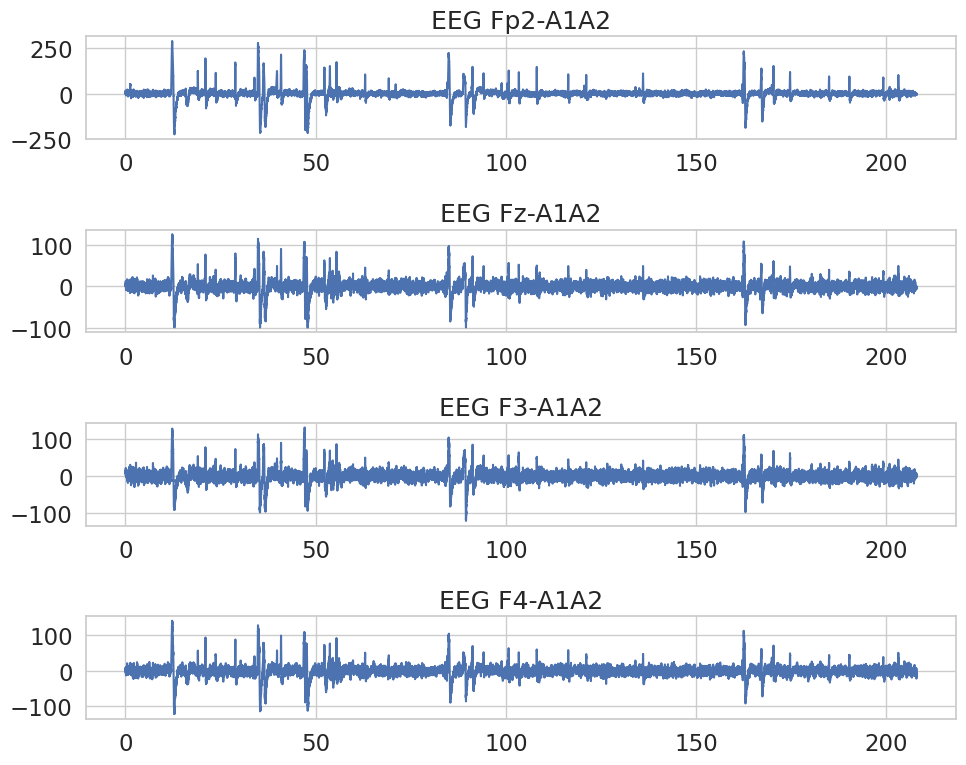

In [7]:
fig, axes = plt.subplots(nrows=4, figsize=(10, 8))

for col, ax in zip(cols, axes.flatten()):
    ax.plot(eeg["time"], eeg[col])
    ax.set_title(col)

fig.tight_layout()

In [8]:
eeg

,time,EEG Fp1-A1A2,EEG Fp2-A1A2,EEG Fz-A1A2,EEG F3-A1A2,EEG F4-A1A2,EEG F7-A1A2,EEG F8-A1A2,EEG Cz-A1A2,EEG C3-A1A2,...,EEG T3-A1A2,EEG T4-A1A2,EEG Pz-A1A2,EEG P3-A1A2,EEG P4-A1A2,EEG T5-A1A2,EEG T6-A1A2,EEG O1-A1A2,EEG O2-A1A2,EEG LOC-ROC
0,0.000,10.532056,1.834553,1.987141,6.717362,2.750080,6.412186,-27.157123,8.243240,-5.642248,...,5.344072,5.649248,2.292317,7.480301,9.311354,4.886309,4.733721,8.701003,5.191484,3.055255
1,0.002,10.989820,2.292317,2.444904,7.785476,3.665607,6.869950,-33.260634,10.837232,-6.862950,...,6.564774,8.701003,3.207843,9.769117,11.905346,6.412186,7.175125,11.294995,6.564774,4.428545
2,0.004,9.769117,3.055255,2.750080,8.853591,3.818194,6.412186,-36.159802,12.973461,-7.320713,...,6.717362,11.294995,3.970782,11.600171,13.888987,7.022537,9.006179,12.820873,6.717362,4.886309
3,0.006,7.175125,3.970782,3.207843,10.074293,3.360431,5.038896,-36.159802,14.041575,-7.320713,...,6.412186,12.820873,4.581133,12.668285,14.804514,7.022537,10.074293,12.973461,6.259599,4.123370
4,0.008,4.123370,5.038896,3.513019,11.142407,2.444904,2.902668,-33.870985,14.499338,-6.710362,...,5.496660,12.820873,4.886309,12.820873,15.414865,6.412186,10.226881,12.363109,5.191484,2.292317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103995,207.990,-6.405186,-0.912027,-2.743080,-3.353431,-2.895668,3.360431,-3.506019,-1.369790,1.834553,...,3.818194,-1.674965,4.886309,9.921705,1.376790,-2.285317,3.818194,7.175125,2.139729,-3.963782
103996,207.992,-17.544094,0.919027,-5.642248,0.003500,-14.034575,5.191484,-6.557774,1.987141,-9.304354,...,0.919027,1.071614,-6.405186,11.752758,-1.522378,1.071614,-7.320713,8.853591,-0.759439,-0.912027
103997,207.994,-25.173482,-0.301676,-7.320713,4.275958,-21.663964,4.123370,-7.931064,6.259599,-17.086330,...,-0.759439,3.513019,-14.034575,10.532056,-3.200843,5.191484,-14.950102,7.785476,-2.437904,3.055255
103998,207.996,-24.105368,-4.116370,-6.405186,7.022537,-20.595849,0.308676,-7.168125,9.006179,-16.018216,...,0.003500,4.275958,-13.119048,6.869950,-2.437904,7.938064,-14.187163,4.123370,-1.674965,5.954423


In [9]:
eeg.head(3)

,time,EEG Fp1-A1A2,EEG Fp2-A1A2,EEG Fz-A1A2,EEG F3-A1A2,EEG F4-A1A2,EEG F7-A1A2,EEG F8-A1A2,EEG Cz-A1A2,EEG C3-A1A2,...,EEG T3-A1A2,EEG T4-A1A2,EEG Pz-A1A2,EEG P3-A1A2,EEG P4-A1A2,EEG T5-A1A2,EEG T6-A1A2,EEG O1-A1A2,EEG O2-A1A2,EEG LOC-ROC
0,0.000,10.532056,1.834553,1.987141,6.717362,2.750080,6.412186,-27.157123,8.243240,-5.642248,...,5.344072,5.649248,2.292317,7.480301,9.311354,4.886309,4.733721,8.701003,5.191484,3.055255
1,0.002,10.989820,2.292317,2.444904,7.785476,3.665607,6.869950,-33.260634,10.837232,-6.862950,...,6.564774,8.701003,3.207843,9.769117,11.905346,6.412186,7.175125,11.294995,6.564774,4.428545
2,0.004,9.769117,3.055255,2.750080,8.853591,3.818194,6.412186,-36.159802,12.973461,-7.320713,...,6.717362,11.294995,3.970782,11.600171,13.888987,7.022537,9.006179,12.820873,6.717362,4.886309


In [11]:
from pycourse.plotting import plot_corr_heatmap

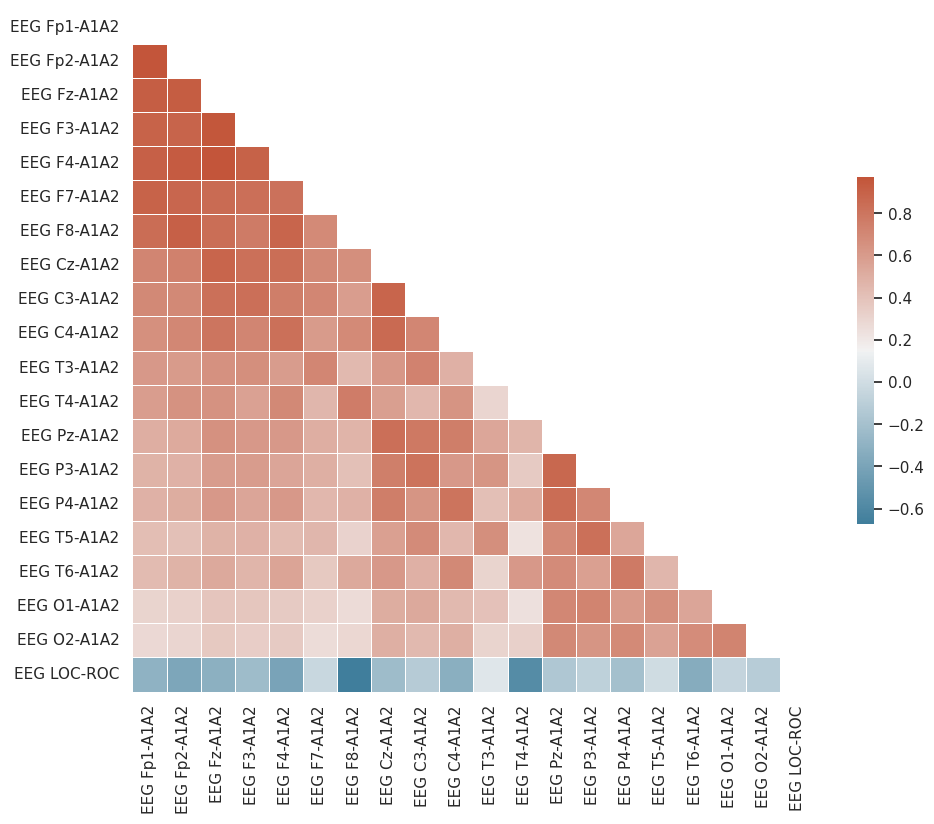

In [12]:
plot_corr_heatmap(eeg, "../output/heatmap.svg")